In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [6]:
df['lcat'].value_counts().head(6)

Residensial                     1711827
Prime Cluster                    711188
Bisnis                           140049
Apartment                         37553
Rumah Kost/Rent & Collective      12968
Pemerintahan/TNI/POLRI            11874
Name: lcat, dtype: int64

In [7]:
def make_df_reg(reg):
    ramah_dict = {}
    marah_dict = {}

    for loc in df['lcat'].value_counts().head(6).index:
        ramah_perc = round(df['emosi'][(df['lcat'] == loc) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
        if ramah_perc not in ramah_dict:
            ramah_dict[loc] = ramah_perc

        marah_perc = round(df['emosi'][(df['lcat'] == loc) & (df['reg'] == reg)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
        if marah_perc not in marah_dict:
            marah_dict[loc] = marah_perc
            
    
    plot = pd.DataFrame(list(marah_dict.items()), columns = ['loc', 'marah_perc'])
    plot = plot.sort_values(by='marah_perc', ascending=True)
    plot['reg'] = reg
    
    return plot

In [27]:
start_time = time.time()

plot1 = make_df_reg(reg=1)
plot2 = make_df_reg(reg=2)
plot3 = make_df_reg(reg=3)
plot4 = make_df_reg(reg=4)
plot5 = make_df_reg(reg=5)
plot6 = make_df_reg(reg=6)
plot7 = make_df_reg(reg=7)

df_conc = pd.concat([plot1.sort_index(), plot2.sort_index(), plot3.sort_index(),
                     plot4.sort_index(), plot5.sort_index(), plot6.sort_index(), plot7.sort_index()])

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 20.488642692565918


In [28]:
df_conc = df_conc.reset_index(drop=True)

In [29]:
df_conc

,loc,marah_perc,reg
0,Residensial,32.90,1
1,Prime Cluster,35.01,1
2,Bisnis,19.57,1
3,Apartment,34.90,1
4,Rumah Kost/Rent & Collective,37.05,1
5,Pemerintahan/TNI/POLRI,19.03,1
6,Residensial,38.45,2
7,Prime Cluster,38.69,2
8,Bisnis,21.42,2
9,Apartment,37.62,2


In [30]:
ramah_dict = {}
marah_dict = {}

for loc in df['lcat'].value_counts().head(6).index:
    ramah_perc = round(df['emosi'][df['lcat'] == loc].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    if ramah_perc not in ramah_dict:
        ramah_dict[loc] = ramah_perc
        
    marah_perc = round(df['emosi'][df['lcat'] == loc].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    if marah_perc not in marah_dict:
        marah_dict[loc] = marah_perc

In [31]:
plot_all = pd.DataFrame(list(marah_dict.items()), columns = ['loc', 'marah_perc'])
# plot_all = plot_all.sort_values(by='marah_perc', ascending=True)

In [32]:
plot_all

,loc,marah_perc
0,Residensial,35.49
1,Prime Cluster,36.94
2,Bisnis,20.24
3,Apartment,36.70
4,Rumah Kost/Rent & Collective,37.20
5,Pemerintahan/TNI/POLRI,22.28


In [35]:
df_conc['ramah_perc'] = df_conc['marah_perc'].apply(lambda x:100-x)

In [64]:
plot_all['ramah_perc'] = plot_all['marah_perc'].apply(lambda x:100-x)

In [68]:
plot_all = plot_all.sort_values('marah_perc')

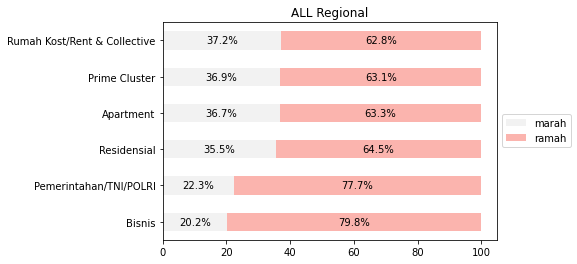

In [70]:
plot_all.plot(x ='loc', kind ='barh', stacked=True, title='ALL Regional', mark_right=True, cmap='Pastel1_r')

df_total = plot_all["marah_perc"] + plot_all["ramah_perc"]
df_rel = plot_all[plot_all.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(plot_all.iloc[:, 1:].cumsum(1)[n], 
                                         plot_all[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend(['marah', 'ramah'], bbox_to_anchor=(1, 0.6))
plt.ylabel('')


plt.show();

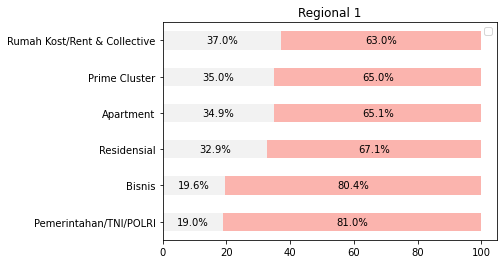

In [60]:
df1 = df_conc[df_conc['reg'] == 1]
df1 = df1.drop('reg', axis=1).sort_values('marah_perc')

df1.plot(x ='loc', kind ='barh', stacked=True, title='Regional 1', mark_right=True, cmap='Pastel1_r')

df_total = df1["marah_perc"] + df1["ramah_perc"]
df_rel = df1[df1.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df1.iloc[:, 1:].cumsum(1)[n], 
                                         df1[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

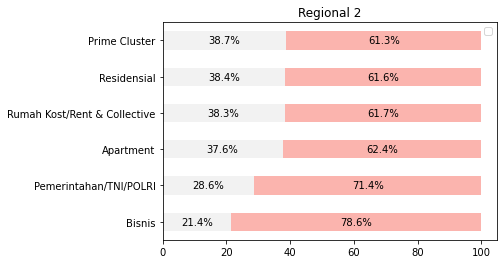

In [61]:
df2 = df_conc[df_conc['reg'] == 2]
df2 = df2.drop('reg', axis=1).sort_values('marah_perc')

df2.plot(x ='loc', kind ='barh', stacked=True, title='Regional 2', mark_right=True, cmap='Pastel1_r')

df_total = df2["marah_perc"] + df2["ramah_perc"]
df_rel = df2[df2.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df2.iloc[:, 1:].cumsum(1)[n], 
                                         df2[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

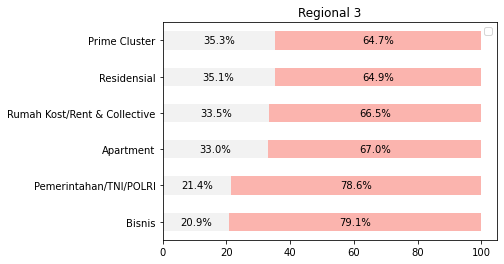

In [62]:
df3 = df_conc[df_conc['reg'] == 3]
df3 = df3.drop('reg', axis=1).sort_values('marah_perc')

df3.plot(x ='loc', kind ='barh', stacked=True, title='Regional 3', mark_right=True, cmap='Pastel1_r')

df_total = df3["marah_perc"] + df3["ramah_perc"]
df_rel = df3[df3.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df3.iloc[:, 1:].cumsum(1)[n], 
                                         df3[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

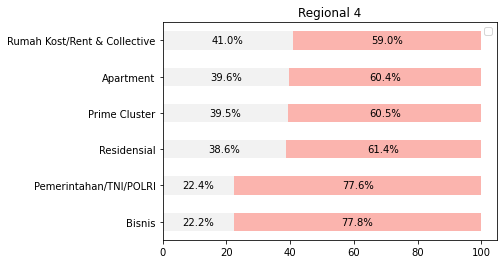

In [63]:
df4 = df_conc[df_conc['reg'] == 4]
df4 = df4.drop('reg', axis=1).sort_values('marah_perc')

df4.plot(x ='loc', kind ='barh', stacked=True, title='Regional 4', mark_right=True, cmap='Pastel1_r')

df_total = df4["marah_perc"] + df4["ramah_perc"]
df_rel = df4[df4.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df4.iloc[:, 1:].cumsum(1)[n], 
                                         df4[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

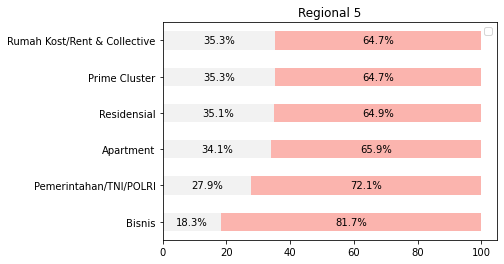

In [71]:
df5 = df_conc[df_conc['reg'] == 5]
df5 = df5.drop('reg', axis=1).sort_values('marah_perc')

df5.plot(x ='loc', kind ='barh', stacked=True, title='Regional 5', mark_right=True, cmap='Pastel1_r')

df_total = df5["marah_perc"] + df5["ramah_perc"]
df_rel = df5[df5.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df5.iloc[:, 1:].cumsum(1)[n], 
                                         df5[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

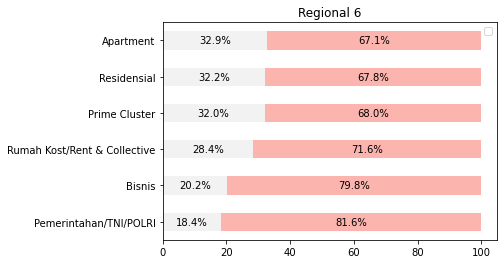

In [72]:
df6 = df_conc[df_conc['reg'] == 6]
df6 = df6.drop('reg', axis=1).sort_values('marah_perc')

df6.plot(x ='loc', kind ='barh', stacked=True, title='Regional 6', mark_right=True, cmap='Pastel1_r')

df_total = df6["marah_perc"] + df6["ramah_perc"]
df_rel = df6[df6.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df6.iloc[:, 1:].cumsum(1)[n], 
                                         df6[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();

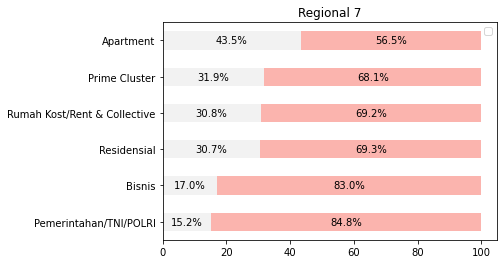

In [73]:
df7 = df_conc[df_conc['reg'] == 7]
df7 = df7.drop('reg', axis=1).sort_values('marah_perc')

df7.plot(x ='loc', kind ='barh', stacked=True, title='Regional 7', mark_right=True, cmap='Pastel1_r')

df_total = df7["marah_perc"] + df7["ramah_perc"]
df_rel = df7[df7.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df7.iloc[:, 1:].cumsum(1)[n], 
                                         df7[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')

plt.legend([])
plt.ylabel('')


plt.show();